In [4]:
from function import process_word, lookup
import pdb
from nltk.corpus import stopwords, twitter_samples
import numpy as np
import pandas as pd
import nltk
import string
from nltk.tokenize import TweetTokenizer
from os import getcwd
import torch
from torch import nn
import torch.nn.functional as F
import pandas as pd
import re
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt

In [6]:
custom_word = "Әу демейтін қазақ жоқ #Good #mo http://kazakhs.com"

print(process_word(custom_word))

['әу', 'демейтін', 'қазақ', 'жоқ', 'good', 'mo']


In [7]:
import re
from collections import Counter

In [8]:
barlyk = Counter(process_word('kzsha.txt'))

In [9]:
def P(soz, N=sum(barlyk.values())):
    return barlyk[soz]/N

In [10]:
def correction(soz): 
    return max(candidates(soz), key=P)

In [11]:
def candidates(soz): 
    return (known([soz]) or known(edits1(soz)) or known(edits2(soz)) or [soz])

In [12]:
def known(soz): 
    return set(w for w in soz if w in barlyk)

In [13]:
def edits1(word):
    letters    = 'аәбвгғдеёжзийкқлмнңоөпрстуұүфхһцчшщъыіьэюя'
    splits     = [(word[:i], word[i:])    for i in range(len(word) + 1)] 
    deletes    = [L + R[1:]               for L, R in splits if R] 
    transposes = [L + R[1] + R[0] + R[2:] for L, R in splits if len(R)>1] 
    replaces   = [L + c + R[1:]           for L, R in splits if R for c in letters]
    inserts    = [L + c + R               for L, R in splits for c in letters]
    return set(deletes + transposes + replaces + inserts)

In [14]:
def edits2(word): 
    return (e2 for e1 in edits1(word) for e2 in edits1(e1))

In [15]:
correction('достық')

'достық'

In [16]:
correction('достқы')

'достқы'

In [17]:
data = open('kzsha.txt', 'r', encoding ='utf8').read()

In [18]:
data[:1000]

'<doc parent_folder="upload" id="file17894331" filename="Ekinshi_bolma.pdf">\nҚуаныш Шонбай\nЕінші болма!\nБИЗНЕСТЕ, КАРЬЕРАДА ЖƏНЕ ӨМІРДЕ ЖЕНІСКЕ ЖЕТУДІҢ ҚАЗАҚША ЖОЛЫ\n3-басылым\nТабысты кəсіпкер ресторатор Қуаныш Шонбай бұл кітабында тұлғаны жəне бизнесті дамытуға қатысты\nақпараттармен бөліседі Екі жарым жылда «Rumi Group» мейрамханалар желісі ең дəмді танымал жəне беделді\nбрендке айналды. Алайда оны білетіндер осы 2,5 жылды ғана көреді. Ал бұған дейінгі Қуаныш мырзаның 8 жыл бойы\nшыңдалған, дайындалған, қателескен, өкінген, банкротқа ұшырап, қайта көтерілгенін көбі білмейді де. Автор өзінің\nмысалында келтірген даму жолдары мен оның қазақша жеңіске жету теориясы өзіңізді жəне кəсібіңізді жаңа\nдеңгейге көтеруге көмектеседі.\nОн тоғыз жасында алғашқы миллионын тапқан кəсіпкердің ақыл-кеңестері кез келген жанға пайдасын тигізері хақ.\nКішігірім, компаниядағы менеджерден бастап мектеп мұғалімі, алпауыт, компанияның атқарушы директоры да бұл\nжазбадан өзіне қажет кеңес таба алады. Жү

In [19]:
data = re.sub(r'[\d\t,.?!-abcdefghijklmnopqrstuvwxyz]','', data).lower().split('\n')
print(data[:10000])

['   ', 'қуаныш шонбай', 'еінші болма', 'бизнесте карьерада жəне өмірде женіске жетудің қазақша жолы', 'басылым', 'табысты кəсіпкер ресторатор қуаныш шонбай бұл кітабында тұлғаны жəне бизнесті дамытуға қатысты', 'ақпараттармен бөліседі екі жарым жылда « » мейрамханалар желісі ең дəмді танымал жəне беделді', 'брендке айналды алайда оны білетіндер осы  жылды ғана көреді ал бұған дейінгі қуаныш мырзаның  жыл бойы', 'шыңдалған дайындалған қателескен өкінген банкротқа ұшырап қайта көтерілгенін көбі білмейді де автор өзінің', 'мысалында келтірген даму жолдары мен оның қазақша жеңіске жету теориясы өзіңізді жəне кəсібіңізді жаңа', 'деңгейге көтеруге көмектеседі', 'он тоғыз жасында алғашқы миллионын тапқан кəсіпкердің ақылкеңестері кез келген жанға пайдасын тигізері хақ', 'кішігірім компаниядағы менеджерден бастап мектеп мұғалімі алпауыт компанияның атқарушы директоры да бұл', 'жазбадан өзіне қажет кеңес таба алады жүзеге асыр да өзгерістерге қадам жаса', '', 'осы кітаптың жарық көруі – балалы

In [20]:
def tokenize_data(data):
    tokens = [x.split() for x in data]
    return tokens
tokenized_data = tokenize_data(data)

In [21]:
tokenized_data[:100]

[[],
 ['қуаныш', 'шонбай'],
 ['еінші', 'болма'],
 ['бизнесте',
  'карьерада',
  'жəне',
  'өмірде',
  'женіске',
  'жетудің',
  'қазақша',
  'жолы'],
 ['басылым'],
 ['табысты',
  'кəсіпкер',
  'ресторатор',
  'қуаныш',
  'шонбай',
  'бұл',
  'кітабында',
  'тұлғаны',
  'жəне',
  'бизнесті',
  'дамытуға',
  'қатысты'],
 ['ақпараттармен',
  'бөліседі',
  'екі',
  'жарым',
  'жылда',
  '«',
  '»',
  'мейрамханалар',
  'желісі',
  'ең',
  'дəмді',
  'танымал',
  'жəне',
  'беделді'],
 ['брендке',
  'айналды',
  'алайда',
  'оны',
  'білетіндер',
  'осы',
  'жылды',
  'ғана',
  'көреді',
  'ал',
  'бұған',
  'дейінгі',
  'қуаныш',
  'мырзаның',
  'жыл',
  'бойы'],
 ['шыңдалған',
  'дайындалған',
  'қателескен',
  'өкінген',
  'банкротқа',
  'ұшырап',
  'қайта',
  'көтерілгенін',
  'көбі',
  'білмейді',
  'де',
  'автор',
  'өзінің'],
 ['мысалында',
  'келтірген',
  'даму',
  'жолдары',
  'мен',
  'оның',
  'қазақша',
  'жеңіске',
  'жету',
  'теориясы',
  'өзіңізді',
  'жəне',
  'кəсібіңізд

In [22]:
sozder = []
for soilem in tokenized_data:
    for token in soilem:
        if token not in sozder:
            sozder.append(token)
            
word2idx = {w: idx for (idx, w) in enumerate(sozder)}
idx2word = {idx: w for (idx, w) in enumerate(sozder)}

sozder_size = len(sozder)

In [23]:
word2idx

{'қуаныш': 0,
 'шонбай': 1,
 'еінші': 2,
 'болма': 3,
 'бизнесте': 4,
 'карьерада': 5,
 'жəне': 6,
 'өмірде': 7,
 'женіске': 8,
 'жетудің': 9,
 'қазақша': 10,
 'жолы': 11,
 'басылым': 12,
 'табысты': 13,
 'кəсіпкер': 14,
 'ресторатор': 15,
 'бұл': 16,
 'кітабында': 17,
 'тұлғаны': 18,
 'бизнесті': 19,
 'дамытуға': 20,
 'қатысты': 21,
 'ақпараттармен': 22,
 'бөліседі': 23,
 'екі': 24,
 'жарым': 25,
 'жылда': 26,
 '«': 27,
 '»': 28,
 'мейрамханалар': 29,
 'желісі': 30,
 'ең': 31,
 'дəмді': 32,
 'танымал': 33,
 'беделді': 34,
 'брендке': 35,
 'айналды': 36,
 'алайда': 37,
 'оны': 38,
 'білетіндер': 39,
 'осы': 40,
 'жылды': 41,
 'ғана': 42,
 'көреді': 43,
 'ал': 44,
 'бұған': 45,
 'дейінгі': 46,
 'мырзаның': 47,
 'жыл': 48,
 'бойы': 49,
 'шыңдалған': 50,
 'дайындалған': 51,
 'қателескен': 52,
 'өкінген': 53,
 'банкротқа': 54,
 'ұшырап': 55,
 'қайта': 56,
 'көтерілгенін': 57,
 'көбі': 58,
 'білмейді': 59,
 'де': 60,
 'автор': 61,
 'өзінің': 62,
 'мысалында': 63,
 'келтірген': 64,
 'даму': 

In [36]:
window_size =2
idx_pairs=[]
for soilem in tokenized_data:
    indices=[word2idx[word] for word in soilem]
    for center_word_pos in range(len(indices)):
        for w in range(-window_size, window_size+1):
            context_word_pos = center_word_pos + w
            if context_word_pos < 0 or context_word_pos >= len(indices) or center_word_pos == context_word_pos:
                continue
            context_word_idx = indices[context_word_pos]
            idx_pairs.append((indices[center_word_pos], context_word_idx))

idx_pairs=np.array(idx_pairs)
            

In [37]:
idx_pairs[:10]

array([[0, 1],
       [1, 0],
       [2, 3],
       [3, 2],
       [4, 5],
       [4, 6],
       [5, 4],
       [5, 6],
       [5, 7],
       [6, 4]])

In [50]:
def get_input_layer(words_idx):
    x = torch.zeros(words_idx.shape[0], sozder_size).float()
    x[list(range(0, words_idx.shape[0])), words_idx] = 1
    return x

In [56]:
embedding_dims =10 
class MyModule(nn.Module):
    def __init__(self):
        super(MyModule, self).__init__()
        self.input = nn.Linear(sozder_size, embedding_dims)
        self.out=nn.Linear(embedding_dims, sozder_size)
    def forward(self, x):
        hidden = self.input(x)
        x = F.relu(hidden)
        x= self.out(x)
        
        return x

In [57]:
l_rate=0.001
model = MyModule()
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
model = model.to(device)
criterion = nn.CrossEntropyLoss()
optim = torch.optim.Adam(model.parameters(), lr=l_rate)
epoch = 50

In [58]:
losses=[]
batch_size=100
for epo in range(epoch):
    loss_val = 0
    idx = np.random.permutation(np.arange(0,idx_pairs.shape[0]))
    for i, batch in enumerate(range(0, idx_pairs.shape[0], batch_size)):
        x= get_input_layer(idx_pairs[batch:batch+batch_size,0]).to(device)
        y_true = torch.from_numpy(np.array([idx_pairs[batch:batch+batch_size,1]])).long().to(device)
        out =model(x)
        loss = criterion(out, y_true.view(-1))
        loss_val += loss.data.item()
        loss.backward()
        optim.step()
        
        model.zero_grad()
    losses.append(loss_val/i)
    if epo%2==0:
        print(f'Loss at epo {epo}: {loss_val/i}')

Loss at epo 0: 10.444772882744877
Loss at epo 2: 10.812514577044663
Loss at epo 4: 10.703776794268002
Loss at epo 6: 10.672763163685397
Loss at epo 8: 10.68166570342922
Loss at epo 10: 10.723695139434957
Loss at epo 12: 10.76321631557649
Loss at epo 14: 10.819721447262271
Loss at epo 16: 10.866961483264324
Loss at epo 18: 10.928303378587536
Loss at epo 20: 10.921286392265484
Loss at epo 22: 10.896006039563613
Loss at epo 24: 10.86348916147699
Loss at epo 26: 10.830025045140497
Loss at epo 28: 10.792883414079926
Loss at epo 30: 10.761426952042662
Loss at epo 32: 10.739928762157703
Loss at epo 34: 10.72607286271643
Loss at epo 36: 10.72497296394324
Loss at epo 38: 10.729707232918607
Loss at epo 40: 10.744443637678023
Loss at epo 42: 10.761891608931066
Loss at epo 44: 10.775015955619518
Loss at epo 46: 10.779756821745002
Loss at epo 48: 10.776832482085933


In [59]:
visualation of the words, near of the words, in/out matrix,

SyntaxError: invalid syntax (<ipython-input-59-70ab94e41519>, line 1)

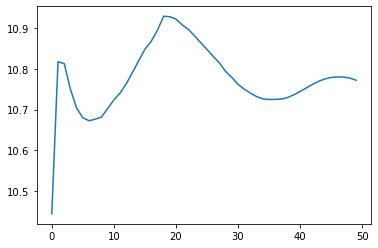

In [60]:
plt.plot(list(range(0, epoch, 1)), losses)

In [62]:
model.eval()
preds = np.ones((len(idx2word), embedding_dims))
for idx, i in enumerate(idx2word.keys()):
  x = get_input_layer(np.array([i])).to(device)
  out = model.input(x)
  preds[idx] = out.detach().cpu().numpy()
print(preds)

[[-1.20944399e-02  4.18981075e+00  1.28604078e+00 ... -2.09204063e-01
   4.00036395e-01 -4.68664244e-03]
 [-1.01604005e-02  5.26528168e+00  2.04763913e+00 ... -1.33412078e-01
   4.58041608e-01 -1.42784193e-02]
 [-9.11273621e-03  4.30341244e+00  1.51422215e+00 ... -2.18301252e-01
   1.17304707e+00 -3.96243110e-03]
 ...
 [-9.90327634e-03  4.38798094e+00  1.25134969e+00 ... -2.12327272e-01
   7.66009688e-02 -1.13041652e-02]
 [-7.95136020e-03  4.13301039e+00  1.12514222e+00 ... -2.11800709e-01
   1.88166693e-01 -1.18387025e-02]
 [-7.55201932e-03  4.30623388e+00  1.33294380e+00 ... -2.12785140e-01
   7.72851169e-01 -1.15292259e-02]]


In [63]:
vec_embedded = TSNE(n_components=2).fit_transform(preds)
vec_embedded

NameError: name 'TSNE' is not defined

In [64]:
from sklearn.manifold import TSNE

In [65]:
vec_embedded = TSNE(n_components=2).fit_transform(preds)
vec_embedded

array([[-33.78863  ,  -2.8436258],
       [-18.104607 ,  41.91761  ],
       [  3.9102223,  16.766172 ],
       ...,
       [-13.330771 , -40.89431  ],
       [ 14.07152  , -18.87207  ],
       [  5.9527006,  -4.1573906]], dtype=float32)

In [66]:
w2v = pd.concat([pd.DataFrame(vec_embedded), pd.Series(list(word2idx.keys()))], axis=1)
w2v.columns = ['x', 'y', 'word']
w2v

,x,y,word
0,-33.788631,-2.843626,қуаныш
1,-18.104607,41.917610,шонбай
2,3.910222,16.766172,еінші
3,-10.912125,18.202044,болма
4,-22.109341,-39.313663,бизнесте
...,...,...,...
132465,9.530738,-25.016613,қанау
132466,30.556910,-15.870720,диктаторлығы
132467,-13.330771,-40.894310,юбилейінде
132468,14.071520,-18.872070,«жиналыс


In [ ]:
plt.figure(figsize=(10, 10))
sns.lmplot('x', 'y', data=w2v, hue='word', fit_reg=False, legend=True)
plt.show()